In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dt = pd.read_csv('new_data.csv')

In [4]:
dt

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94
5,362861.36,156991.12
6,127716.82,156122.51
7,323876.68,155752.60
8,311613.29,152211.77
9,304981.62,149759.96


In [5]:
dt.describe()

,Marketing Spend,Profit
count,50.000000,50.000000
mean,211025.097800,112012.639200
std,122290.310726,40306.180338
min,0.000000,14681.400000
25%,129300.132500,90138.902500
50%,212716.240000,107978.190000
75%,299469.085000,139765.977500
max,471784.100000,192261.830000


In [6]:
X = dt["Marketing Spend"]
y = dt["Profit"]
m = len(X) 

In [7]:
type(y)

pandas.core.series.Series

[0, 600000, 0, 250000]

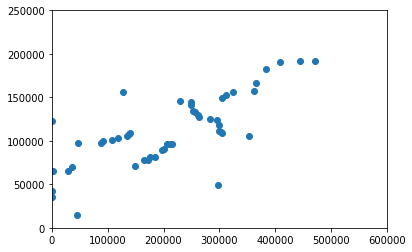

In [8]:
plt.scatter(dt["Marketing Spend"], dt["Profit"])
plt.axis([0,600000, 0, 250000])

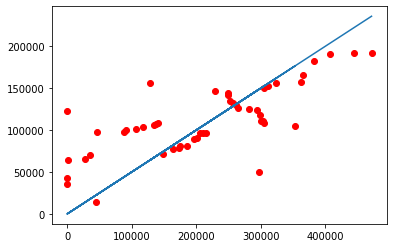

In [9]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', color='r', label = "training data")
ax.plot(X, 2 + 0.5*X, label = 'h(x) = 2 + 0.5 *X')

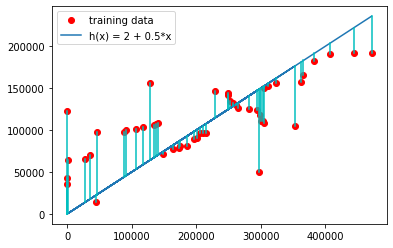

In [10]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', color='r', label='training data')
ax.plot(X, 2 + 0.5*X, label='h(x) = 2 + 0.5*x')
for i in range(len(X)):
    ax.plot([X[i], X[i]], [2 + 0.5*X[i], y[i]], '-', color='c')
plt.legend()

In [11]:
def h(X, a0, a1):                             # hypothesis
    h = a0 + a1*X
    return h
def J(a0, a1, X, y, m):                       #cost function
    j = 0
    for i in range (m):
        j += (h(X[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, X, y, m):                    # gradient of cost function
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(X[i],a0,a1) - y[i])
        Dja1 += (h(X[i],a0,a1) - y[i]) * X[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                    # updating the theta values
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1


0.6054374239309103 0.244459361836546


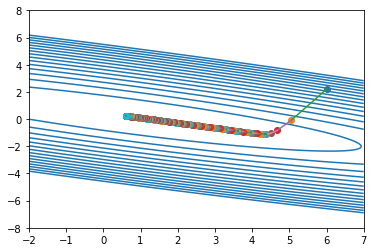

In [12]:
fig, ax = plt.subplots()
p0 = np.linspace(-2,7, 500)
p1 = np.linspace(-8,8, 500)
pa0, pa1 = np.meshgrid(p0, p1)      #The numpy.meshgrid function is used to create a rectangular grid out of 
                                    #two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. 

ax.contour(pa0,pa1,J(pa0,pa1,X/100000,y/100000,m=len(X)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
# levels : int or array-like, optional Determines the number and positions of the contour lines / regions.
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,X/100000,y/100000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)

In [13]:
x_mean = X.mean()
x_std = X.std()

y_mean = y.mean()
y_std = y.std()

x_new = (X - x_mean) / x_std           #mean Normalization
y_new = (y - y_mean) / y_std

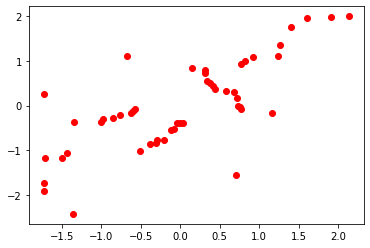

In [14]:
fig, ax = plt.subplots()
ax.plot(x_new, y_new, 'o', color='r', label='training data')

-1 4
-0.49999999999999944 2.406405203653323
-0.24999999999999953 1.593671857516518
-0.12499999999999972 1.1791778509867479
-0.0624999999999999 0.9677859076565649
-0.031250000000000014 0.8599760165581716
-0.015625000000000108 0.804992972097991
-0.007812500000000208 0.7769516194232989
-0.00390625000000017 0.762650529559206
-0.0019531250000001743 0.7553569737285186
-0.00097656250000017 0.751637260254868


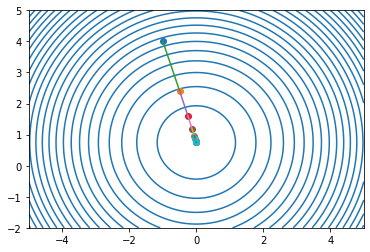

In [40]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :     # to draw contour plots and current value of theta
    fig, ax = plt.subplots()
    # setup the contour axis
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    # plot the Cost function J
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(X)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

    # starting point
    #a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    # do the gradient descent loop and plot the progress
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) # the updated parameters
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)

-1 4
-0.49999999999999944 2.406405203653323
-0.24999999999999953 1.593671857516518
-0.12499999999999972 1.1791778509867479
-0.0624999999999999 0.9677859076565649
-0.031250000000000014 0.8599760165581716
-0.015625000000000108 0.804992972097991
-0.007812500000000208 0.7769516194232989
-0.00390625000000017 0.762650529559206
-0.0019531250000001743 0.7553569737285186
-0.00097656250000017 0.751637260254868


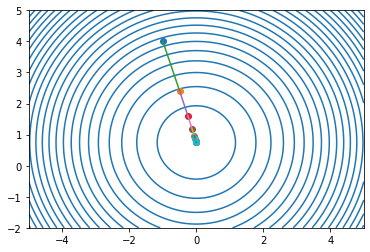

In [42]:
plot_steps([-1, 4], 0.5, 10)

In [43]:
a0, a1

(0.6054374239309103, 0.244459361836546)

In [44]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

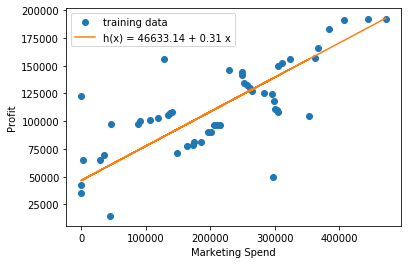

In [50]:
a0 = 0; a1 = 0.94
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(X,y, 'o', label='training data')
ax.plot(X, b0 + b1*X, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend();

In [16]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [17]:
a0 = 0
a1 = 0.94
predict(8000, a0, a1)

49111.69318849813